# Comparing netCDF scaling parameter Files

This Jupyter notebook contains a Python script that compares two sets of netCDF files. The script loads the files from two different directories, and then compares the variables in the files to determine if they are equal.

The script uses the `xarray` library, which is commonly used for working with multi-dimensional arrays and datasets. It first imports the `xarray` library using the `import` statement:

```python
import xarray as xr 

In [1]:
# Define directory paths and filenames

# Paths to directories containing the restart files
path1 = '/discover/nobackup/amfox/Experiments/ASCAT_noscale_test_debug/ASCAT_M36/output/SMAP_EASEv2_M36_GLOBAL/stats/z_score_clim_db'
path2 = '/discover/nobackup/amfox/Experiments/ASCAT_noscale_test_debug/ASCAT_M36/output/SMAP_EASEv2_M36_GLOBAL/stats/z_score_clim'

# Name of the restart files
file1 = 'M36_zscore_stats_2015_p37_2017_p36_W_15p_Nmin_5_spALL_p09.nc4'
file2 = 'M36_zscore_stats_2015_p37_2017_p36_W_15p_Nmin_5_AD_p09.nc4'

In [2]:
# Import libraries and define functions

import xarray as xr

def compare_restart_files_old(path1, path2, file1, file2):
    # Load the restart files
    ds1 = xr.open_dataset(path1+'/'+file1, engine='netcdf4')
    ds2 = xr.open_dataset(path2+'/'+file2, engine='netcdf4')

    # Check that the dimensions of the files are the same
    if ds1.dims != ds2.dims:
        raise ValueError('The dimensions of the two files are not the same')

    # Determine the number and name of the variables in the files
    print('ds1: ', ds1.data_vars)
    print('ds2: ', ds2.data_vars)

    # Determine the number and name of the dimensions in the files
    print('ds1: ', ds1.dims)
    print('ds2: ', ds2.dims)

    # Determine the number of variables in the files
    print('ds1: ', len(ds1.data_vars))
    print('ds2: ', len(ds2.data_vars))

    # Loop over all the variables in the files, and compare them, printing their names and whether they are equal
    for var in ds1.data_vars:
        print(var, ds1[var].equals(ds2[var]))

    # Loop over all the variables in the files, printing their names and the mean difference between them
    for var in ds1.data_vars:
        print(f"{var} = {float((ds1[var]-ds2[var]).mean())}")# Cell 3: Call the compare_restart_files function

In [3]:
import xarray as xr
import numpy as np

def compare_selected_variables_old(path1, path2, file1, file2, tol=1e-6):
    # Load the restart files
    ds1 = xr.open_dataset(path1+'/'+file1, engine='netcdf4')
    ds2 = xr.open_dataset(path2+'/'+file2, engine='netcdf4')

    # Check that the dimensions of the files are the same
    if ds1.dims != ds2.dims:
        raise ValueError('The dimensions of the two files are not the same')

    # Determine the number and name of the variables in the files
    print('ds1: ', ds1.data_vars)
    print('ds2: ', ds2.data_vars)

    # Determine the number and name of the dimensions in the files
    print('ds1: ', ds1.dims)
    print('ds2: ', ds2.dims)

    # Determine the number of variables in the files
    print('ds1: ', len(ds1.data_vars))
    print('ds2: ', len(ds2.data_vars))

    # Loop over the selected variables in the files, and compare them, printing their names and whether they are equal
    for var in ['CAPAC', 'CATDEF', 'CDCR1', 'GHTCNT1']:
        if ds1[var].equals(ds2[var]):
            print(f"{var} = 0.0")
        else:
            diff = (ds1[var] - ds2[var]).values
            abs_diff = np.abs(diff)
            if np.all(abs_diff < tol):
                print(f"{var} = {float((ds1[var]-ds2[var]).mean())} (within tolerance)")
            else:
                print(f"{var} = {float((ds1[var]-ds2[var]).mean())} (not within tolerance)")

    # Loop over the selected variables in the files, printing their names and the mean difference between them
    for var in ['CAPAC', 'CATDEF', 'CDCR1', 'GHTCNT1']:
        print(f"{var} = {float((ds1[var]-ds2[var]).mean())}")

In [4]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

def compare_selected_variables(path1, path2, file1, file2):
    # Load the datasets
    ds1 = xr.open_dataset(path1+'/'+file1, engine='netcdf4')
    ds2 = xr.open_dataset(path2+'/'+file2, engine='netcdf4')

    # Check that the dimensions of the datasets are the same
    if ds1.dims != ds2.dims:
        raise ValueError('The dimensions of the two datasets are not the same')

    # Determine the selected variables in the datasets
    variables = ['colind', 'rowind', 'o_mean', 'o_std', 'm_mean', 'm_std', 'n_data']
    variables = [var for var in variables if var in ds1.data_vars and var in ds2.data_vars]

    # Loop over the selected variables in the datasets, and calculate the mean absolute difference, maximum difference, and RMSE
    mean_abs_diffs = []
    max_abs_diffs = []
    rmses = []
    plot_variables = []
    for var in variables:
        if 'subtile' in ds1[var].dims and 'subtile' in ds2[var].dims:
            for i in range(4):
                diff = ds1[var].isel(subtile=i) - ds2[var].isel(subtile=i)
                abs_diff = np.abs(diff)
                mean_abs_diff = abs_diff.mean().values
                mean_abs_diffs.append(mean_abs_diff)
                max_abs_diff = abs_diff.max().values
                max_abs_diffs.append(max_abs_diff)
                rmse = np.sqrt((diff**2).mean().values)
                rmses.append(rmse)
                plot_variables.append(f"{var} subtile {i}")

        else:
            diff = ds1[var] - ds2[var]
            abs_diff = np.abs(diff)
            mean_abs_diff = abs_diff.mean().values
            mean_abs_diffs.append(mean_abs_diff)
            max_abs_diff = abs_diff.max().values
            max_abs_diffs.append(max_abs_diff)
            rmse = np.sqrt((diff**2).mean().values)
            rmses.append(rmse)
            plot_variables.append(var)
    
    # Check if any of the mean absolute differences are not zero
    if any(mean_abs_diffs):
        # Create a bar plot of the mean absolute difference for the selected variables
        plt.figure(figsize=(12, 6))
        plt.bar(plot_variables, mean_abs_diffs)
        plt.xlabel('Variable')
        plt.ylabel('Mean absolute difference')
        plt.title('Mean absolute difference between datasets')
        plt.xticks(rotation=90)
        plt.yscale('log')
        plt.show()

        # Create a bar plot of the maximum absolute difference for the selected variables
        plt.figure(figsize=(12, 6))
        plt.bar(plot_variables, max_abs_diffs)
        plt.xlabel('Variable')
        plt.ylabel('Maximum absolute difference')
        plt.title('Maximum absolute difference between datasets')
        plt.xticks(rotation=90)
        plt.yscale('log')
        plt.show()

        # Create a bar plot of the RMSE for the selected variables
        plt.figure(figsize=(12, 6))
        plt.bar(plot_variables, rmses)
        plt.xlabel('Variable')
        plt.ylabel('RMSE')
        plt.title('RMSE between datasets')
        plt.xticks(rotation=90)
        plt.yscale('log')
        plt.show()
    else:
        print("All mean absolute differences are zero")

    # Print the mean absolute difference, maximum absolute difference, and RMSE for each variable
    for i, var in enumerate(plot_variables):
        print(f"{i+1}. {var}:")
        print(f"   Mean absolute difference: {mean_abs_diffs[i]:.4e}")
        print(f"   Maximum absolute difference: {max_abs_diffs[i]:.4e}")
        print(f"   RMSE: {rmses[i]:.4e}")
        

    print(ds1['colind'])   
    
    for i in range(10):
        print(f"{i}: {ds1.colind.values[i]} {ds2.colind.values[i]}")
        
    for i in range(10):
        print(f"{i}: {ds1.rowind.values[i]} {ds2.rowind.values[i]}")
        

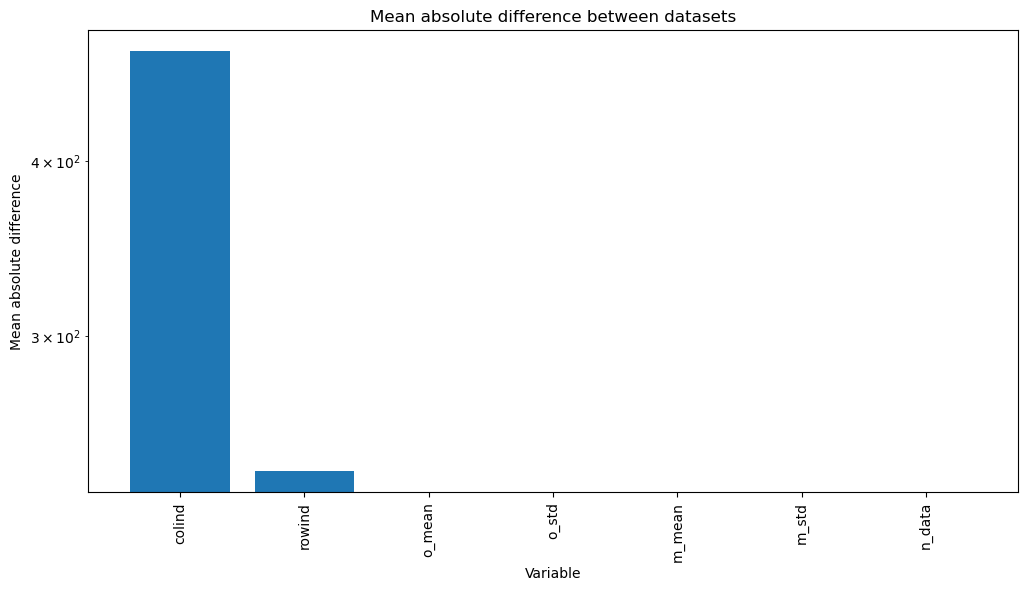

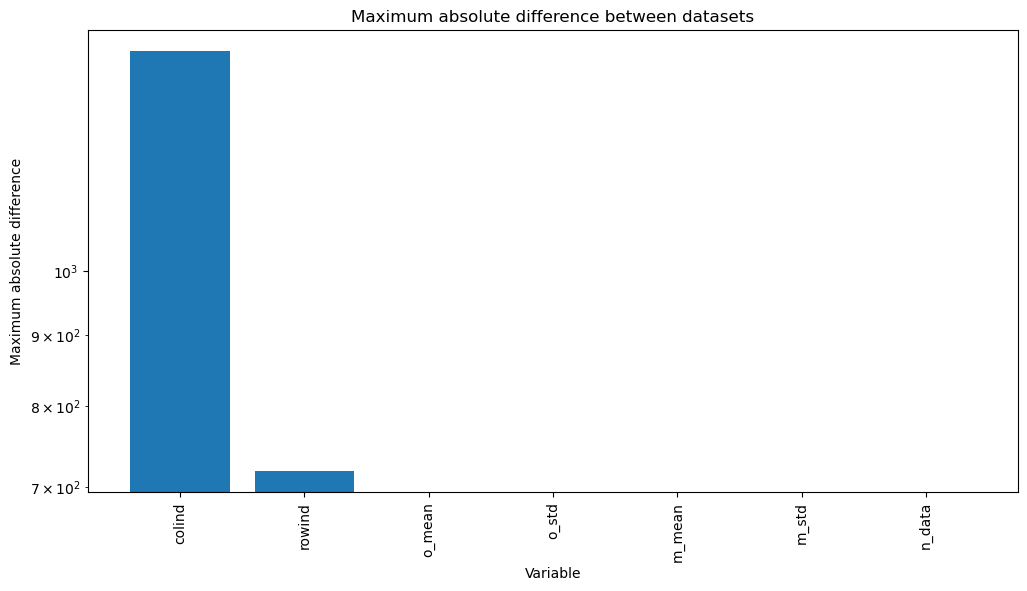

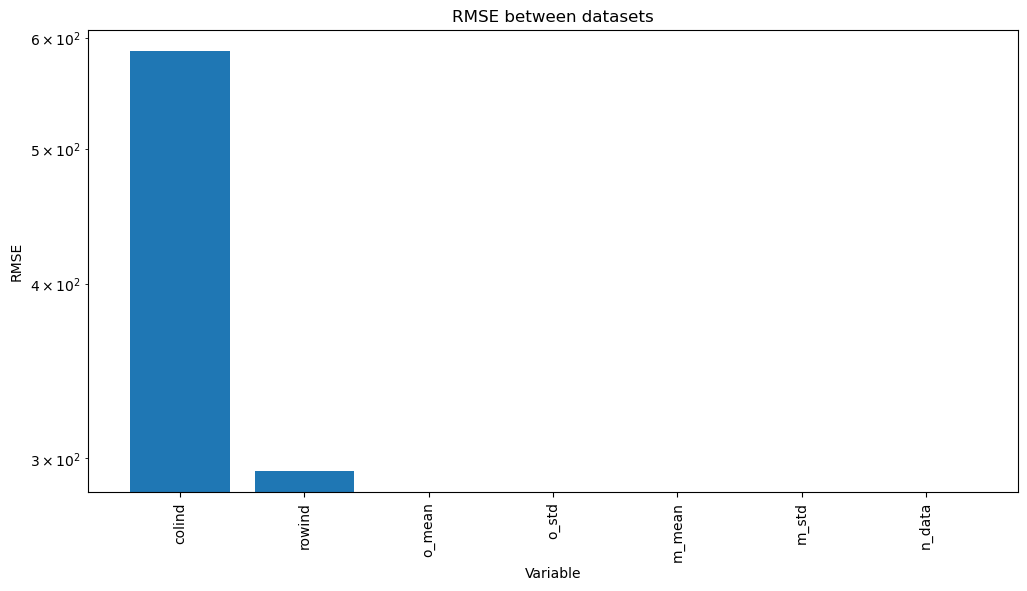

1. colind:
   Mean absolute difference: 4.7975e+02
   Maximum absolute difference: 1.4380e+03
   RMSE: 5.8757e+02
2. rowind:
   Mean absolute difference: 2.4000e+02
   Maximum absolute difference: 7.1900e+02
   RMSE: 2.9394e+02
3. o_mean:
   Mean absolute difference: 0.0000e+00
   Maximum absolute difference: 0.0000e+00
   RMSE: 0.0000e+00
4. o_std:
   Mean absolute difference: 0.0000e+00
   Maximum absolute difference: 0.0000e+00
   RMSE: 0.0000e+00
5. m_mean:
   Mean absolute difference: 0.0000e+00
   Maximum absolute difference: 0.0000e+00
   RMSE: 0.0000e+00
6. m_std:
   Mean absolute difference: 0.0000e+00
   Maximum absolute difference: 0.0000e+00
   RMSE: 0.0000e+00
7. n_data:
   Mean absolute difference: 0.0000e+00
   Maximum absolute difference: 0.0000e+00
   RMSE: 0.0000e+00
<xarray.DataArray 'colind' (grid: 1036800)>
[1036800 values with dtype=float64]
Dimensions without coordinates: grid
0: 1.0 1.0
1: 2.0 1.0
2: 3.0 1.0
3: 4.0 1.0
4: 5.0 1.0
5: 6.0 1.0
6: 7.0 1.0
7: 8.0 1.0

In [5]:
compare_selected_variables(path1, path2, file1, file2)